# Primjena alfa-beta obrezivanja u igri križić-kružić

Ova bilježnica istražuje primjenu Minimax algoritma, u kombinaciji s **Alfa-Beta obrezivanjem**, za stvaranje inteligentnog bota za igru križić-kružić.

**Minimax algoritam** je klasični algoritam teorije igara koji se koristi za pronalaženje optimalnog poteza u igrama s dva igrača s nultom sumom. U kontekstu križić-kružića, algoritam simulira sve moguće poteze i ocjenjuje ih na temelju toga vode li do pobjede, poraza ili remija.
</br>
</br>

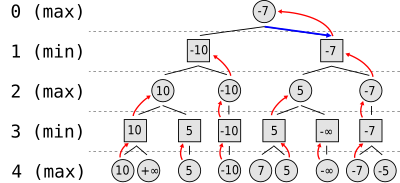
</br>
</br>
By Nuno Nogueira (Nmnogueira) - Own work using: http://en.wikipedia.org/wiki/Image:Minimax.svg, created in Inkscape by author, CC BY-SA 2.5, https://commons.wikimedia.org/w/index.php?curid=2276653
</br>
</br>
**Alfa-beta obrezivanje** je tehnika optimizacije koja se koristi za smanjenje broja čvorova koje Minimax algoritam mora pretražiti. Obrezivanje se temelji na ideji da ako je već pronađen potez koji je bolji od trenutnog, onda nema potrebe dalje pretraživati druge mogućnosti.
</br>
</br>

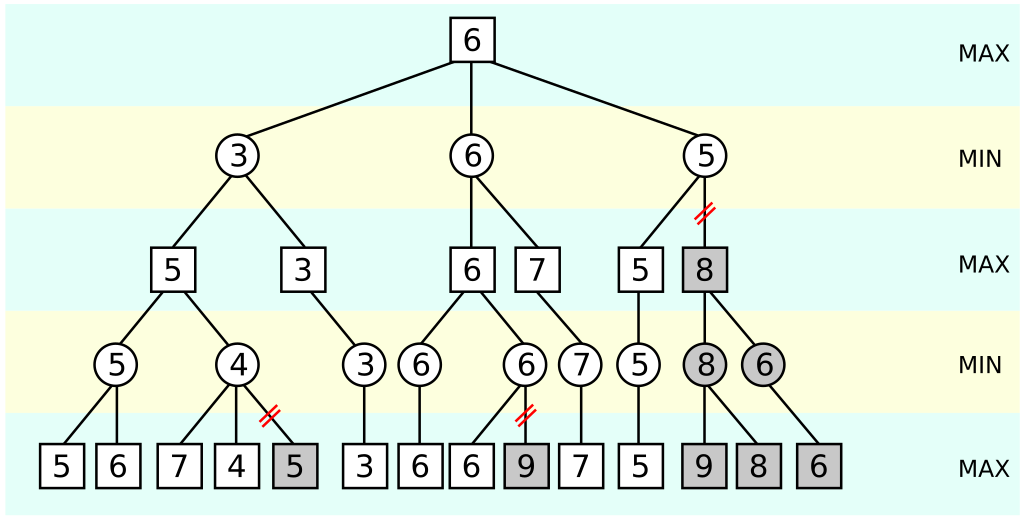

By Jez9999, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=3708424

<br>

U ovoj bilježnici ćemo implementirati **Minimax algoritam s Alfa-Beta obrezivanjem** i koristiti ga za stvaranje bota koji igra križić-kružić protiv ljudskog igrača. Također ćemo analizirati performanse algoritma i istražiti kako različiti parametri utječu na njegovu učinkovitost.

Cilj ove bilježnice je demonstrirati kako **Minimax algoritam s Alfa-Beta obrezivanjem** možemo iskoristiti za stvaranje **inteligentnih botova** za igranje igara za dva igrača, te pokazati koliko Alfa-Beta obrezivanje **ubrzava evaluaciju** budućih poteza.

___

Prvo ćemo izraditi bota koji će igrati protiv nas odabirući poteze nasumično. Naš bot će pseudoslučajno odabrati polje i provjeriti okupiranost polja. Ako je polje okupirano, pokušat će ponovo nasumično odabrati polje. Ako je prazno, onda će na tome polju upisati svoj znak.

In [2]:
import random

def print_board(board):

  """Ispisuje ploču za igru."""

  print("-------------")

  for i in range(3):
    print("|", board[i][0], "|", board[i][1], "|", board[i][2], "|")
    print("-------------")

def player_move(board):

  """Uzima unos igrača i ažurira ploču."""

  while True:
    try:
      move = int(input("Unesite broj od 1 do 9: "))

      if move >= 1 and move <= 9:
        row = (move - 1) // 3
        col = (move - 1) % 3
        if board[row][col] == " ":
          board[row][col] = "X"
          break

        else:
          print("Polje je već zauzeto. Pokušajte ponovo.")
      else:
        print("Nevažeći broj. Pokušajte ponovo.")

    except ValueError:
      print("Nevažeći unos. Pokušajte ponovo.")

def computer_move(board):

  """Bot bira nasumično polje i ažurira ploču."""

  while True:
    row = random.randint(0, 2)
    col = random.randint(0, 2)

    if board[row][col] == " ":
      board[row][col] = "O"
      break

def check_win(board, player):

  """Provjerava je li igrač pobijedio."""

  for i in range(3):
    if board[i][0] == board[i][1] == board[i][2] == player:
      return True
    if board[0][i] == board[1][i] == board[2][i] == player:
      return True
  if board[0][0] == board[1][1] == board[2][2] == player:
    return True
  if board[0][2] == board[1][1] == board[2][0] == player:
    return True
  return False

def check_draw(board):

  """Provjerava je li igra završila neriješeno."""

  for i in range(3):
    for j in range(3):
      if board[i][j] == " ":
        return False
  return True

def play_game():

  """Pokreće igru."""

  board = [[" " for _ in range(3)] for _ in range(3)]
  print_board(board)

  while True:
    player_move(board)
    print_board(board)

    if check_win(board, "X"):
      print("Pobijedili ste!")
      break

    if check_draw(board):
      print("Neriješeno!")
      break

    computer_move(board)

    print_board(board)

    if check_win(board, "O"):
      print("Bot je pobijedio!")
      break

    if check_draw(board):
      print("Neriješeno!")
      break

play_game()

-------------
|   |   |   |
-------------
|   |   |   |
-------------
|   |   |   |
-------------
Unesite broj od 1 do 9: 1
-------------
| X |   |   |
-------------
|   |   |   |
-------------
|   |   |   |
-------------
-------------
| X |   |   |
-------------
|   |   | O |
-------------
|   |   |   |
-------------
Unesite broj od 1 do 9: 2
-------------
| X | X |   |
-------------
|   |   | O |
-------------
|   |   |   |
-------------
-------------
| X | X |   |
-------------
|   |   | O |
-------------
|   | O |   |
-------------
Unesite broj od 1 do 9: 3
-------------
| X | X | X |
-------------
|   |   | O |
-------------
|   | O |   |
-------------
Pobijedili ste!


Igrajući protiv ovakvoga bota, lako možemo zaključiti da nije težak protivnik.

Sada ćemo izraditi bota koji će uz pomoć Minimax algoritma **bez Alfa-Beta obrezivanja** odabirati potez koji će biti povoljan za njega.

In [3]:
# globalne varijable za mjerenje efikasnosti algoritama

accumulative_game_search_count_ABP = 0
accumulative_game_search_count_no_ABP = 0

move_search_count_ABP = 0
move_search_count_NoABP = 0

In [4]:
def minimax_no_pruning(board, depth, is_maximizing):
  """
  Implementira minimax algoritam bez obrezivanja za križić-kružić.

  Args:
    board: Dvodimenzionalna lista koja predstavlja ploču za igru.
    depth: Trenutna dubina rekurzije.
    is_maximizing: True ako je na redu bot (O), False ako je na redu čovjek (X).

  Returns:
    Najbolja ocjena za trenutni potez.
  """
  global accumulative_game_search_count_no_ABP
  global move_search_count_NoABP

  accumulative_game_search_count_no_ABP += 1
  move_search_count_NoABP += 1

  # Provjeri je li igra gotova.
  if check_win(board, 'O'):
    return 1  # Bot je pobijedio.
  if check_win(board, 'X'):
    return -1  # Čovjek je pobijedio.
  if check_draw(board):
    return 0  # Remi.

  # Ako nije kraj igre, nastavi s rekurzijom.
  if is_maximizing:
    best_score = -float('inf')
    for i in range(3):
      for j in range(3):
        if board[i][j] == ' ':
          board[i][j] = 'O'
          score = minimax_no_pruning(board, depth + 1, False)
          board[i][j] = ' '
          best_score = max(score, best_score)
    return best_score
  else:
    best_score = float('inf')
    for i in range(3):
      for j in range(3):
        if board[i][j] == ' ':
          board[i][j] = 'X'
          score = minimax_no_pruning(board, depth + 1, True)
          board[i][j] = ' '
          best_score = min(score, best_score)
    return best_score


def get_best_move(board):
  """
  Pronalazi najbolji potez za bota (O) pomoću minimax algoritma bez obrezivanja.

  Args:
    board: Dvodimenzionalna lista koja predstavlja ploču za igru.

  Returns:
    Tuple (red, stupac) koji predstavlja najbolji potez.
  """

  best_score = -float('inf')
  best_move = (-1, -1)

  for i in range(3):
    for j in range(3):
      if board[i][j] == ' ':
        board[i][j] = 'O'
        score = minimax_no_pruning(board, 0, False)
        board[i][j] = ' '
        if score > best_score:
          best_score = score
          best_move = (i, j)

  return best_move
def computer_move_MM_algorythm(board):

    """Igraj najbolji potez za AI bota koristeći Min-Max algoritam."""

    best_move = get_best_move(board)
    board[best_move[0]][best_move[1]] = 'O'


In [5]:
def play_game_MM_Algorythm():

  """Pokreće igru sa botom koji koristi Minimax algoritam."""

  board = [[" " for _ in range(3)] for _ in range(3)]
  print_board(board)

  while True:
    player_move(board)
    print_board(board)

    if check_win(board, "X"):
      print("Pobijedili ste!")
      break

    if check_draw(board):
      print("Neriješeno!")
      break

    computer_move_MM_algorythm(board)

    print_board(board)

    if check_win(board, "O"):
      print("Bot je pobijedio!")
      break

    if check_draw(board):
      print("Neriješeno!")
      break

play_game_MM_Algorythm()

-------------
|   |   |   |
-------------
|   |   |   |
-------------
|   |   |   |
-------------
Unesite broj od 1 do 9: 1
-------------
| X |   |   |
-------------
|   |   |   |
-------------
|   |   |   |
-------------
-------------
| X |   |   |
-------------
|   | O |   |
-------------
|   |   |   |
-------------
Unesite broj od 1 do 9: 3
-------------
| X |   | X |
-------------
|   | O |   |
-------------
|   |   |   |
-------------
-------------
| X | O | X |
-------------
|   | O |   |
-------------
|   |   |   |
-------------
Unesite broj od 1 do 9: 6
-------------
| X | O | X |
-------------
|   | O | X |
-------------
|   |   |   |
-------------
-------------
| X | O | X |
-------------
|   | O | X |
-------------
|   | O |   |
-------------
Bot je pobijedio!


Igrajući protiv bota koji može vidjeti poteze unaprijed, vidjet ćemo da ga je nemoguće pobijediti jer kako god mi odigrali igru, on će naći potez koji će ga odvesti do izjednačenja ili pobjede.

Sada ćemo izraditi bota koji će uz Minimax algoritam koristiti i Alfa-Beta obrezivanje.

In [6]:
def minimax_alpha_beta(board, depth=0, alpha=-float('inf'), beta=float('inf'), is_maximizing=True):
  """
  Implementira minimax algoritam s alfa-beta obrezivanjem za križić-kružić.

  Args:
    board: Dvodimenzionalna lista koja predstavlja ploču za igru.
    depth: Trenutna dubina rekurzije.
    alpha: Najbolja ocjena do sada za igrača koji maksimizira.
    beta: Najbolja ocjena do sada za igrača koji minimizira.
    is_maximizing: True ako je na redu bot (O), False ako je na redu čovjek (X).

  Returns:
    Najbolja ocjena za trenutni potez.
  """

  global accumulative_game_search_count_ABP
  global move_search_count_ABP

  accumulative_game_search_count_ABP += 1
  move_search_count_ABP += 1

  # Provjeri je li igra gotova.
  if check_win(board, 'O'):
    return 1  # Bot je pobijedio.
  if check_win(board, 'X'):
    return -1  # Čovjek je pobijedio.
  if check_draw(board):
    return 0  # Remi.

  # Ako nije kraj igre, nastavi s rekurzijom.
  if is_maximizing:
    best_score = -float('inf')
    for i in range(3):
      for j in range(3):
        if board[i][j] == ' ':
          board[i][j] = 'O'
          score = minimax_alpha_beta(board, depth + 1, alpha, beta, False)
          board[i][j] = ' '
          best_score = max(score, best_score)
          alpha = max(alpha, best_score)
          if beta <= alpha:
            break  # Beta obrezivanje
    return best_score
  else:
    best_score = float('inf')
    for i in range(3):
      for j in range(3):
        if board[i][j] == ' ':
          board[i][j] = 'X'
          score = minimax_alpha_beta(board, depth + 1, alpha, beta, True)
          board[i][j] = ' '
          best_score = min(score, best_score)
          beta = min(beta, best_score)
          if beta <= alpha:
            break  # Alfa obrezivanje
    return best_score

def get_best_move_ABP(board):
  """
  Pronalazi najbolji potez za bota (O) pomoću minimax algoritma bez obrezivanja.

  Args:
    board: Dvodimenzionalna lista koja predstavlja ploču za igru.

  Returns:
    Tuple (red, stupac) koji predstavlja najbolji potez.
  """

  best_score = -float('inf')
  best_move = (-1, -1)

  for i in range(3):
    for j in range(3):
      if board[i][j] == ' ':
        board[i][j] = 'O'
        score = minimax_alpha_beta(board, 0, -float('inf'), float('inf'), False)
        board[i][j] = ' '
        if score > best_score:
          best_score = score
          best_move = (i, j)

  return best_move

def computer_move_MM_AB_algorythm(board):

    """Igraj najbolji potez za AI bota koristeći Minimax algoritam sa Alfa-Beta obrezivanjem."""

    best_move = get_best_move_ABP(board)
    board[best_move[0]][best_move[1]] = 'O'


In [7]:
def play_game_MM_And_AB_Algorythm():

  """Pokreće igru sa botom koji koristi Minimax algoritam sa Alfa-Beta obrezivanjem."""

  board = [[" " for _ in range(3)] for _ in range(3)]
  print_board(board)

  while True:
    player_move(board)
    print_board(board)

    if check_win(board, "X"):
      print("Pobijedili ste!")
      break

    if check_draw(board):
      print("Neriješeno!")
      break

    computer_move_MM_AB_algorythm(board)

    print_board(board)

    if check_win(board, "O"):
      print("Bot je pobijedio!")
      break

    if check_draw(board):
      print("Neriješeno!")
      break

play_game_MM_And_AB_Algorythm()

-------------
|   |   |   |
-------------
|   |   |   |
-------------
|   |   |   |
-------------
Unesite broj od 1 do 9: 1
-------------
| X |   |   |
-------------
|   |   |   |
-------------
|   |   |   |
-------------
-------------
| X |   |   |
-------------
|   | O |   |
-------------
|   |   |   |
-------------
Unesite broj od 1 do 9: 3
-------------
| X |   | X |
-------------
|   | O |   |
-------------
|   |   |   |
-------------
-------------
| X | O | X |
-------------
|   | O |   |
-------------
|   |   |   |
-------------
Unesite broj od 1 do 9: 6
-------------
| X | O | X |
-------------
|   | O | X |
-------------
|   |   |   |
-------------
-------------
| X | O | X |
-------------
|   | O | X |
-------------
|   | O |   |
-------------
Bot je pobijedio!


Ovaj bot, isto kao i prethodni, nikad neće izgubiti igru. Ali kako bi vidjeli zašto je bolji, usporediti ćemo vrijeme izvođenja računanja poteza i koliko puta se poziva minimax funkcija u oba slučaja. To jest, koliko smo čvorova/mogućih pozicija istražili.

In [8]:
import time



def play_game_comparison():
  board = [[" " for _ in range(3)] for _ in range(3)]

  global accumulative_game_search_count_ABP
  global accumulative_game_search_count_no_ABP
  global move_search_count_ABP
  global move_search_count_NoABP

  while True:
    player_move(board)
    print_board(board)

    if check_win(board, "X"):
      print("Pobijedili ste!\n ABP search count: ", accumulative_game_search_count_ABP, "\n No ABP search count: ", accumulative_game_search_count_no_ABP)
      accumulative_game_search_count_ABP = 0
      accumulative_game_search_count_no_ABP = 0
      break

    if check_draw(board):
      print("Neriješeno!\n ABP search count: ", accumulative_game_search_count_ABP, "\n No ABP search count: ", accumulative_game_search_count_no_ABP)
      accumulative_game_search_count_ABP = 0
      accumulative_game_search_count_no_ABP = 0
      break

    start_time = time.time()
    best_move_abp = get_best_move_ABP(board)
    end_time = time.time()
    abp_time = end_time - start_time

    start_time = time.time()
    best_move_minimax = get_best_move(board)
    end_time = time.time()
    minimax_time = end_time - start_time

    board[best_move_abp[0]][best_move_abp[1]] = 'O'
    print_board(board)

    print("ABO | Time: ", abp_time, "s\nN of nodes searched: ", move_search_count_ABP, "\nMove: ", best_move_abp)
    print("No ABO | Time: ", minimax_time, "s\n N of nodes searched: ", move_search_count_NoABP,  "\nMove: ", best_move_minimax)
    move_search_count_ABP = 0
    move_search_count_NoABP = 0
    # Provjera je li računalo pobijedilo
    if check_win(board, "O"):
      print("Računalo je pobijedilo!\n ABP search count: ", accumulative_game_search_count_ABP, "\n No ABP search count: ", accumulative_game_search_count_no_ABP)
      break

    if check_draw(board):
      print("Neriješeno!\n ABP search count: ", accumulative_game_search_count_ABP, "\n No ABP search count: ", accumulative_game_search_count_no_ABP2)
      break

play_game_comparison()

Unesite broj od 1 do 9: 1
-------------
| X |   |   |
-------------
|   |   |   |
-------------
|   |   |   |
-------------
-------------
| X |   |   |
-------------
|   | O |   |
-------------
|   |   |   |
-------------
ABO | Time:  0.049271583557128906 s
N of nodes searched:  26725 
Move:  (1, 1)
No ABO | Time:  0.16448616981506348 s
 N of nodes searched:  120371 
Move:  (1, 1)
Unesite broj od 1 do 9: 2
-------------
| X | X |   |
-------------
|   | O |   |
-------------
|   |   |   |
-------------
-------------
| X | X | O |
-------------
|   | O |   |
-------------
|   |   |   |
-------------
ABO | Time:  0.0014920234680175781 s
N of nodes searched:  527 
Move:  (0, 2)
No ABO | Time:  0.002568483352661133 s
 N of nodes searched:  934 
Move:  (0, 2)
Unesite broj od 1 do 9: 7
-------------
| X | X | O |
-------------
|   | O |   |
-------------
| X |   |   |
-------------
-------------
| X | X | O |
-------------
| O | O |   |
-------------
| X |   |   |
-------------
ABO | Time:  

Zaključno, prema rezultatima koje sam dobio za poteze redom: "1", "2", "7", "6" i "9", Minimax algoritam bez Alfa-Beta obrezivanja posjetio je 121355 čvorova, dok je algoritam sa Alfa-Beta obrezivanjem to uradio 27299 puta.

Najveća razlika se osjeti u prvom potezu jer tada imamo puno mogućih opcija pa je za Alfa-Beta obrezivanje rezultat iznosio 26725 čvorova, a bez obrezivanja 120371 čvorova.

U drugom potezu, bez Alfa-Beta obrezivanja posjetilo se 934 čvora, dok je sa obrezivanjem posjećeno tek 527 čvorova.

U trećem potezu nema nekog značajnog poboljšanja, jer imamo sve manji broj mogućih pozicija pa je rezultat za algoritam sa obrezivanjem broj čvorova 46, a za algoritam bez obrezivanja 43.

I na kraju u četvrtom potezu, oba algoritma su posjetila isti broj čvorova, njih četiri.

Uvidom u ove rezultate, zaključujemo da ima smisla koristiti Alfa-beta obrezivanje kada imamo mnogo čvorova, jer ćemo uštedjeti na vremenu računanja sljedećeg poteza. No kada imamo mali broj mogućih poteza, onda nam to obrezivanje ne igra veliku ulogu, jer su uštede u vremenu računanja zanemarive.
